In [4]:
import ast
import glob
import json
import re
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np

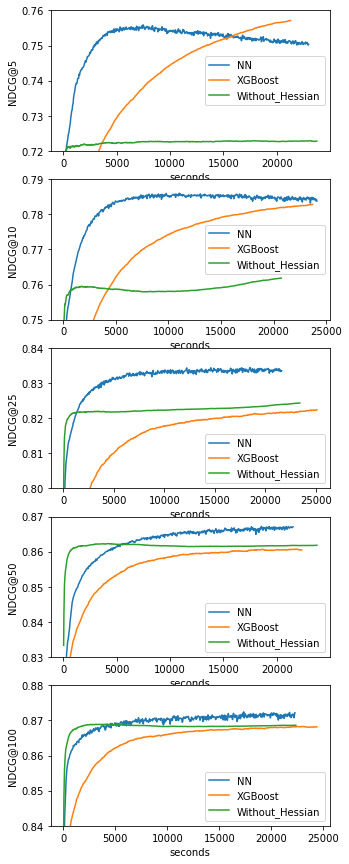

In [5]:
fig, ax = plt.subplots(5, 1, figsize=(5, 15))

for count, k in enumerate([5, 10, 25, 50, 100]):
    NN_files = glob.glob("K={}/experiment_nn_yahoo_{}-*.out".format(k, k))
    NN_NDCGs = []
    NN_runtimes = []
    for file in NN_files:
        with open(file, "r") as f:
            line = f.readlines()
        ndcg_value = []
        time = []
        for dic in eval(line[0]):
            ndcg_value.append(
                dic["test result"]["dataset normalized maximum likelihood"]
            )
            time.append(dic["total time"])
        NN_runtimes.append(time)
        NN_NDCGs.append(ndcg_value)

    XGBoost_files = glob.glob("K={}/experiment_xgboost_yahoo_{}-*.out".format(k, k))
    XGBoost_NDCGs = []
    XGBoost_runtimes = []
    for file in XGBoost_files:
        with open(file, "r") as f:
            lines = f.readlines()
        time = []
        for i in eval(lines[1]):
            time.append(i["time"])
        XGBoost_runtimes.append(time)
        XGBoost_NDCGs.append(eval(lines[0])["test"]["NDCG@{}".format(k)])

    Without_Hessian_files = glob.glob(
        "K={}/experiment_without_hessian_yahoo_{}-*.out".format(k, k)
    )
    Without_Hessian_NDCGs = []
    Without_Hessian_runtimes = []
    for file in Without_Hessian_files:
        with open(file, "r") as f:
            lines = f.readlines()
        time = []
        for i in eval(lines[1]):
            time.append(i["time"])
        Without_Hessian_runtimes.append(time)
        Without_Hessian_NDCGs.append(eval(lines[0])["test"]["NDCG@{}".format(k)])

    ax[count].plot(
        np.mean(np.array(NN_runtimes), axis=0),
        np.mean(np.array(NN_NDCGs), axis=0),
        label="NN",
    )
    ax[count].plot(
        np.mean(np.array(XGBoost_runtimes), axis=0),
        np.mean(np.array(XGBoost_NDCGs), axis=0),
        label="XGBoost",
    )
    ax[count].plot(
        np.mean(np.array(Without_Hessian_runtimes), axis=0),
        np.mean(np.array(Without_Hessian_NDCGs), axis=0),
        label="Without_Hessian",
    )
    ax[count].legend()
    if k == 5:
        ax[count].set_ylim(0.72, 0.76)
    elif k == 10:
        ax[count].set_ylim(0.75, 0.79)
    elif k == 25:
        ax[count].set_ylim(0.80, 0.84)
    elif k == 50:
        ax[count].set_ylim(0.83, 0.87)
    else:
        ax[count].set_ylim(0.84, 0.88)
    ax[count].set_xlabel("seconds")
    ax[count].set_ylabel("NDCG@{}".format(k))
    
plt.show()